## <font color='blue'>Setup 1</font>: Load Libraries

In [7]:
import numpy as np
import pandas as pd
import sys, os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 6.0)
plt.style.use('ggplot')

## <font color='blue'>Setup 2</font>: Load Data

In [63]:
def load_table(tablename):
    """ Defining the current directory and path to where data are located. Joining path to
    data folder and table name in order to read the table into a Pandas DataFrame"""
    
    file_path = os.path.join ('../data/') 

    df = os.path.join(file_path, tablename) 
    df = pd.read_csv(df, sep=',', encoding="latin1") 
    
    return df

In [64]:
df_leads = load_table('olist_marketing_qualified_leads_dataset.csv')
df_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [65]:
df_leads.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,71a592ef199d8e8f91b3ee5feecd86f1,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [66]:
def land_page_map():
    land_page_dict = {}
    ID = 0
    for page in df_leads['landing_page_id'].unique():
        land_page_dict[page] = ID
        ID += 1
        
    return land_page_dict

In [67]:
page_id_map = land_page_map()

In [68]:
def create_mapping_column(df):
    plot_id = []
    for i in df['landing_page_id']:
        plot_id.append(page_id_map.get(i))
    
    return plot_id

In [101]:
def plot_top_n_land_page(df, n):
    series = pd.DataFrame(df,columns = ['landing_page_id'])
    series['plot_id'] = create_mapping_column(df)
    
    #page_count = series['plot_id'].value_counts()/len(df)
    series['freq'] = series['plot_id'].map(series['plot_id'].value_counts())
    series = series.groupby(['landing_page_id','plot_id'])['freq'].agg('max').reset_index()
    series = series.sort_values(by=['freq'],ascending=False)
    page_count = series[:n]
    
    sns.barplot(page_count['plot_id'], page_count['freq'], order = page_count['freq'], alpha=0.8, color="salmon")
    #sns.barplot(data = series, x = 'plot_id', y = 'freq', order alpha=0.8, color="salmon")
    plt.title('Top 10 frequency of landing page id where the lead was aquired')
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Landing page id', fontsize=12)
    plt.show()

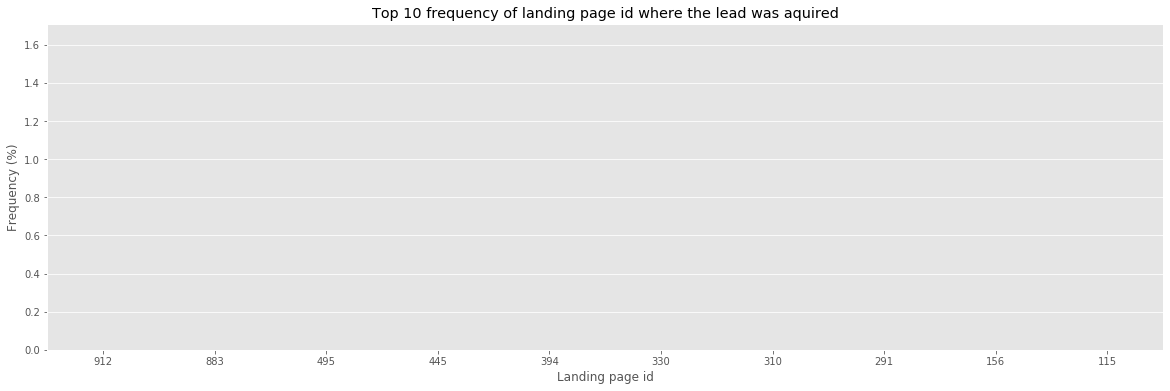

In [102]:
plot_top_n_land_page(df_leads,10)

In [ ]:
def plot_origin(df):
    series = pd.DataFrame(df,columns = ['origin'])
    origin_count = series['origin'].value_counts()/len(df)
    
    sns.barplot(origin_count.index, origin_count.values , alpha=0.8, color="salmon")
    plt.title('Top 10 frequency of the type of media where the lead was aquired')
    plt.ylabel('Frequency (%)', fontsize=12)
    plt.xlabel('Origin', fontsize=12)
    plt.show()

In [ ]:
plot_origin(df_leads)

In [ ]:
def plot_timeline(df, pct = True, log = False, origin = True):
    series = pd.DataFrame(df,columns = ['first_contact_date','origin'])
    series['freq'] = series.groupby(['first_contact_date','origin'])['first_contact_date'].transform('count')
    series = series.drop_duplicates()
    
    new = series["first_contact_date"].str.split("-", n = 2, expand = True)
    series['first_contact_month'] = new[0]+'-'+new[1]+'-'+'01'
    
    series = series.groupby(['first_contact_month','origin'])['freq'].agg('sum').reset_index()
    
    series['log_value'] = np.log(series['freq'])
    series['log2_value'] = np.log2(series['freq'])
    series['percentage'] = series['freq']/len(df)
    series['first_contact_month'] = pd.to_datetime(series.first_contact_month)
    
    if origin == True:
        
        if pct == True:
            sns.lineplot(data=series,x='first_contact_month',y='percentage',hue='origin',err_style=None)
            plt.title('Percentage of frequency over time by type of media where the lead was aquired')
            plt.ylabel('Frequency (%)', fontsize=12)
            plt.xlabel('Date', fontsize=12)
            plt.show()
        
        else:
            if log == True:
                sns.lineplot(data=series,x='first_contact_month',y='log_value',hue='origin',err_style=None)
                plt.title('Log value of frequency over time by type of media where the lead was aquired')
                plt.ylabel('Log value of frequency', fontsize=12)
                plt.xlabel('Date', fontsize=12)
                plt.show()
                
            else:
                sns.lineplot(data=series,x='first_contact_month',y='freq',hue='origin',err_style=None)
                plt.title('Frequency over time by type of media where the lead was aquired')
                plt.ylabel('Frequency', fontsize=12)
                plt.xlabel('Date', fontsize=12)
                plt.show()
    
    else:
        sns.lineplot(data=series,x='first_contact_month',y='freq',err_style=None)
        plt.title('Frequency over time where the lead was aquired')
        plt.ylabel('Frequency', fontsize=12)
        plt.xlabel('Date', fontsize=12)
        plt.show()     
        

In [ ]:
plot_timeline(df_leads, pct = True, log = False, origin = True)